In [145]:
import os
import subprocess as sp
input_dir = "input/"
cache_mode = "MarkP"
output_dir = "./output/"
error = "1.0"
#<workloadname>_<cache_size_for_predictions>_<max_page_id>_<misses for optimal algorithm>.
# <no_of_unique_requests>,<total_number_of_requests> and <total_number_of_misses>
#list all files in input directory

x = []
y1 = []  #hit rate for LRU
y2 = []  #hit rate for opt

for i in os.listdir(input_dir):
    j = i.split("_")
    cachesize = int(j[1])
    max_pages = int(j[2])
    optmisses = int(j[3])

    cmd = "./build/tester " + str(i) + " " + cache_mode + " " + error + " >> log.txt"
    print(cmd)
    child = sp.Popen(cmd,shell=True)
    child.wait()
    output_file = output_dir + str(i) +"_"+ str(error)+ "." + cache_mode
    fp = open(output_file,"r")
    outlist = fp.read().split(" ")
    hitrate1 = 1 - (float(outlist[2])/float(outlist[1])) 
    hitrate2 = 1 - (optmisses/float(outlist[1]))
    fp.close()
    x.append(cachesize)
    y1.append(hitrate1)

    y2.append(hitrate2)

   
    
print(x)
print(y1)
print(y2)




./build/tester random_600_1250_913 MarkP 1.0 >> log.txt
./build/tester random_300_1250_300 MarkP 1.0 >> log.txt
./build/tester random_100_250_225 MarkP 1.0 >> log.txt
./build/tester random_600_1250_1080 MarkP 1.0 >> log.txt
./build/tester random_100_500_303 MarkP 1.0 >> log.txt
./build/tester random_200_1000_358 MarkP 1.0 >> log.txt
./build/tester random_600_1250_600 MarkP 1.0 >> log.txt
./build/tester random_300_1250_958 MarkP 1.0 >> log.txt
./build/tester random_500_1250_975 MarkP 1.0 >> log.txt
./build/tester random_200_1250_1173 MarkP 1.0 >> log.txt
./build/tester random_500_1250_966 MarkP 1.0 >> log.txt
./build/tester random_300_1000_881 MarkP 1.0 >> log.txt
./build/tester random_200_500_664 MarkP 1.0 >> log.txt
./build/tester random_400_500_508 MarkP 1.0 >> log.txt
./build/tester random_400_1000_887 MarkP 1.0 >> log.txt
./build/tester random_200_500_789 MarkP 1.0 >> log.txt
./build/tester random_100_250_336 MarkP 1.0 >> log.txt
./build/tester random_500_1000_500 MarkP 1.0 >> log.

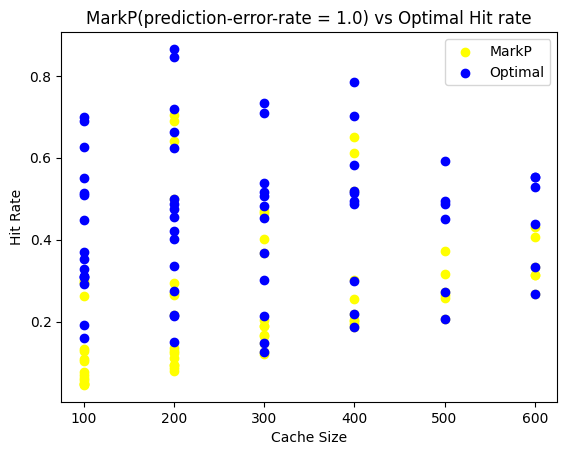

In [146]:
import matplotlib.pyplot as plt


plt.xlabel("Cache Size")
plt.ylabel("Hit Rate")
plt.scatter(x,y1,color = '#FFFF00',label = "MarkP")
plt.scatter(x,y2,color ="#0000FF",label = "Optimal")
plt.legend()


plot_dir = "plots/"
plot_name = "MarkP(prediction-error-rate = " + str(error) + ") vs Optimal"
plt.title(plot_name + " Hit rate")
plt.savefig(plot_dir+plot_name + ".png",format = "png")
# plt.show()    



In [147]:
import numpy as np



mean_file = "mean.txt"

fp = open(mean_file,"a")

print("MarkP mean", np.mean(y1))
print("Optimal mean", np.mean(y2))
fp.write(plot_name + str(",") + str(np.mean(y1))+ "," + str(np.mean(y2)) + "\n")
fp.close()

MarkP mean 0.25203763380587796
Optimal mean 0.4450774438243157


In [148]:
#write ccolor to hex code
